In [1]:
pip install "numpy<2.0"

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade matplotlib scikit-learn seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade numexpr bottleneck



     -------------------------------------- 145.0/145.0 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 112.1/112.1 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: numexpr
    Found existing installation: numexpr 2.8.3
    Uninstalling numexpr-2.8.3:
      Successfully uninstalled numexpr-2.8.3
  Attempting uninstall: bottleneck
    Found existing installation: Bottleneck 1.3.5
    Uninstalling Bottleneck-1.3.5:
      Successfully uninstalled Bottleneck-1.3.5


In [2]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [3]:
#Loading dataset
data = pd.read_csv("customer_data_with_churn.csv")
print("Number of data point: ", len(data))
data.head()

Number of data point:  2000


,CustomerID,Name,Age,Gender,Annual_Income,Spending_Score,Membership_Level,Purchase_Frequency,Churn_Status
0,CUST1000,Connor Rowland,40,Female,52777,27,Gold,5.2,0
1,CUST1001,Cameron Miles MD,28,Female,65910,84,Basic,12.2,0
2,CUST1002,Dennis Price,63,Male,56731,51,Silver,2.9,1
3,CUST1003,Jessica Jones,23,Female,40559,56,Platinum,11.1,0
4,CUST1004,Kevin Bauer,38,Male,79675,74,Basic,10.7,0


In [4]:
data.describe()

,Age,Annual_Income,Spending_Score,Purchase_Frequency,Churn_Status
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,43.57150,59849.506000,50.469500,8.000450,0.332500
std,15.13137,14451.507584,29.059289,3.987447,0.471227
min,18.00000,9857.000000,1.000000,1.000000,0.000000
25%,30.00000,49818.500000,25.000000,4.600000,0.000000
50%,43.00000,60036.500000,51.000000,8.000000,0.000000
75%,57.00000,69631.500000,76.000000,11.500000,1.000000
max,69.00000,110053.000000,100.000000,15.000000,1.000000


# DATA CLEANING

In [5]:
# Information of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          2000 non-null   object 
 1   Name                2000 non-null   object 
 2   Age                 2000 non-null   int64  
 3   Gender              2000 non-null   object 
 4   Annual_Income       2000 non-null   int64  
 5   Spending_Score      2000 non-null   int64  
 6   Membership_Level    2000 non-null   object 
 7   Purchase_Frequency  2000 non-null   float64
 8   Churn_Status        2000 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


There's no missing values on the data

In [6]:
print("Unique categories of Gender :", data["Gender"].unique())
print("Unique categories of Membership Level :", data["Membership_Level"].unique())

Unique categories of Gender : ['Female' 'Male']
Unique categories of Membership Level : ['Gold' 'Basic' 'Silver' 'Platinum']


In [7]:
# Exploring uniqe value in the categorical value
print("Total categories in the feature Gender:\n", data["Gender"].value_counts(), "\n")
print("Total categories in the feature Membership Level:\n", data["Membership_Level"].value_counts())

Total categories in the feature Gender:
 Gender
Male      1012
Female     988
Name: count, dtype: int64 

Total categories in the feature Membership Level:
 Membership_Level
Silver      593
Basic       586
Gold        529
Platinum    292
Name: count, dtype: int64


In [8]:
#Dropping some of non-informative features
to_drop = ["CustomerID", "Name"]
data = data.drop(to_drop, axis=1)

In [9]:
data["Membership_Level"] = pd.Categorical(
    data["Membership_Level"],
    categories=["Silver", "Basic", "Gold", "Platinum"],
    ordered=True
)
data["Membership_Level"] = data["Membership_Level"].cat.codes

In [10]:
data["Gender"] = data["Gender"].replace({"Female": 0, "Male": 1})
data["Gender"] = data["Gender"].astype("int")

In [11]:
data.head()

,Age,Gender,Annual_Income,Spending_Score,Membership_Level,Purchase_Frequency,Churn_Status
0,40,0,52777,27,2,5.2,0
1,28,0,65910,84,1,12.2,0
2,63,1,56731,51,0,2.9,1
3,23,0,40559,56,3,11.1,0
4,38,1,79675,74,1,10.7,0


In [12]:
print(data["Gender"].unique())

[0 1]


<Axes: >

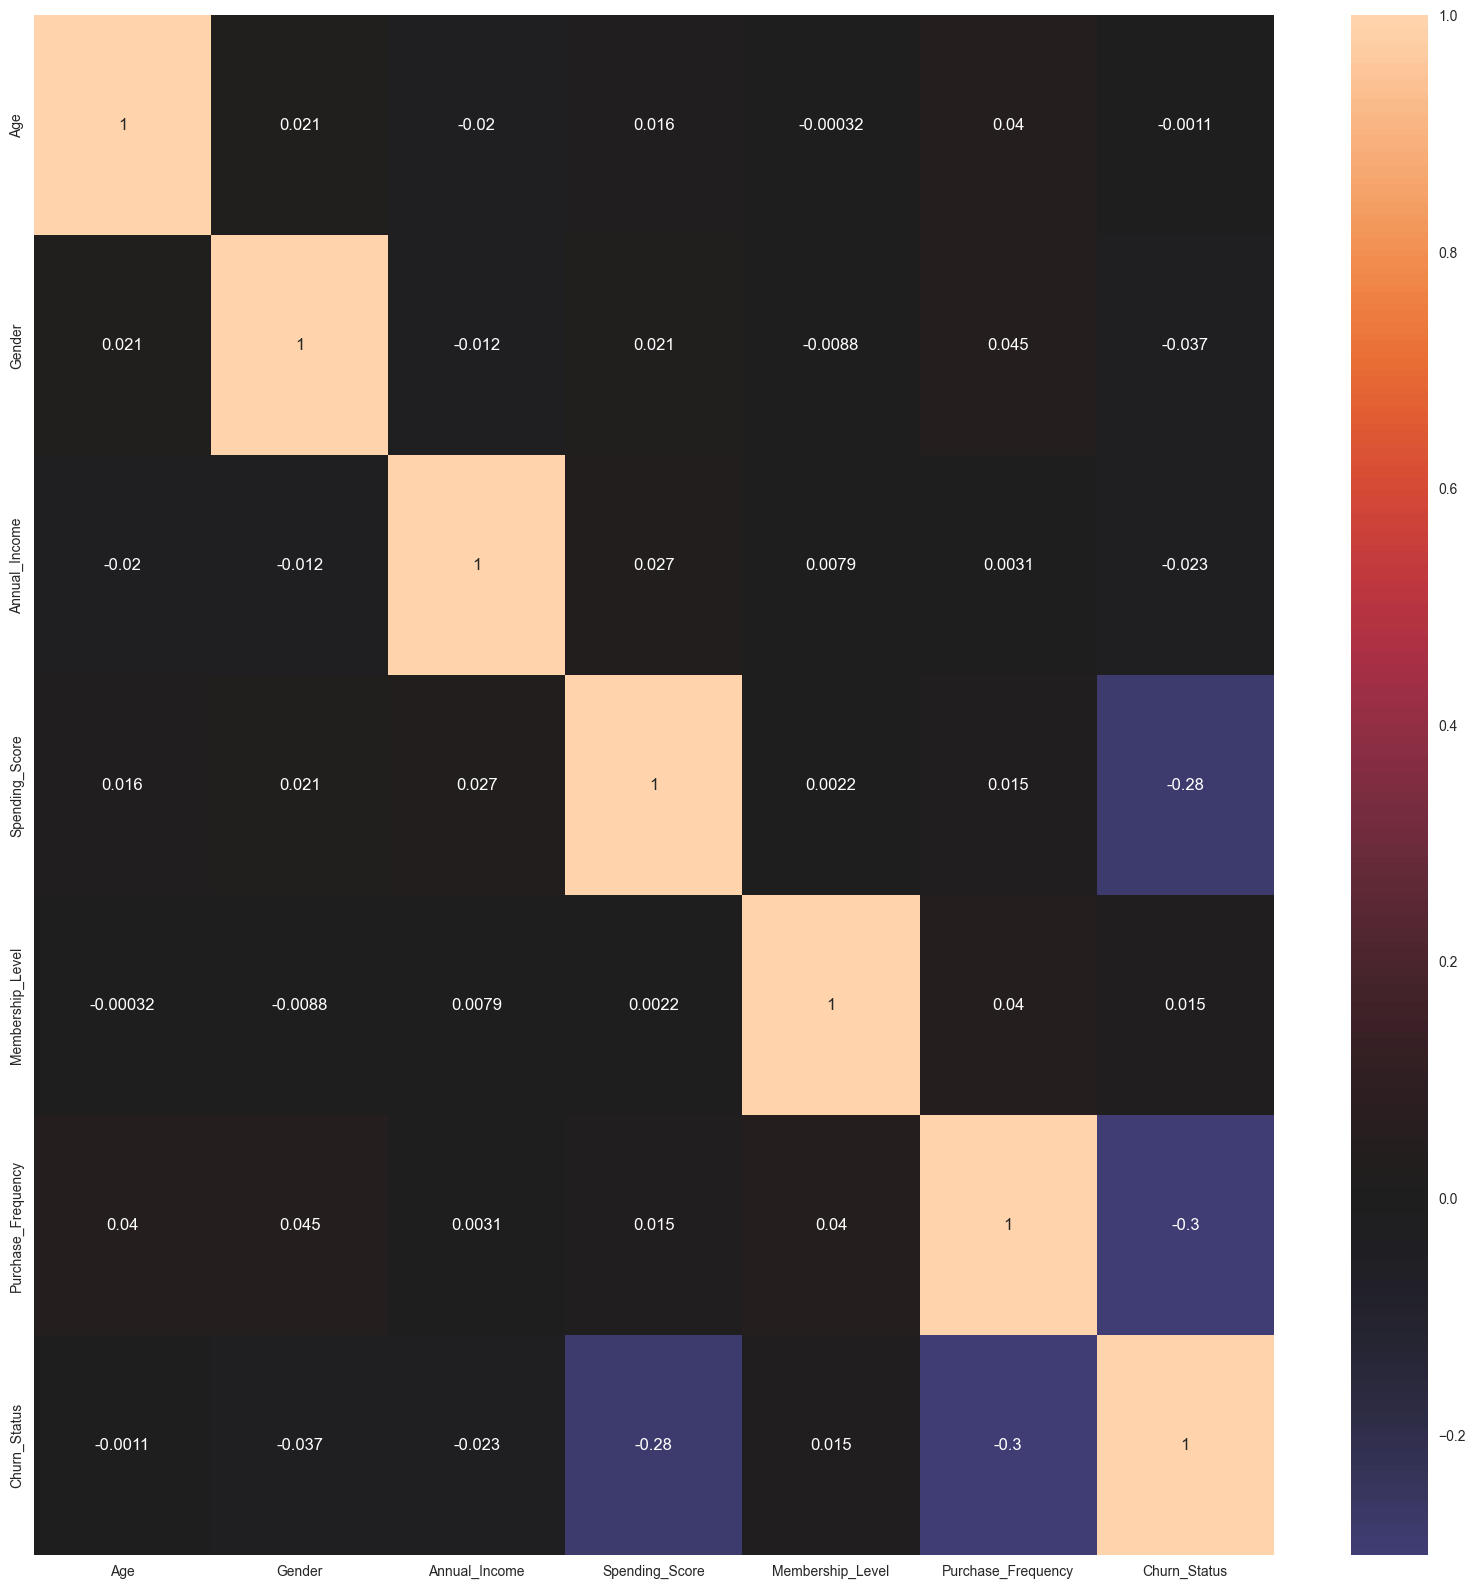

In [13]:
#correlation matrix
corrmat = data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)

# DATA PREPROCESSING

In [14]:
#Scaling
scaler = StandardScaler()
scaler.fit(data)
scaled_data = pd.DataFrame(scaler.transform(data),columns= data.columns )
ds=scaled_data
print("All features are now scaled")
ds.head()

All features are now scaled


,Age,Gender,Annual_Income,Spending_Score,Membership_Level,Purchase_Frequency,Churn_Status
0,-0.236092,-1.012073,-0.489518,-0.807844,0.712924,-0.702492,-0.705781
1,-1.029345,-1.012073,0.419472,1.154154,-0.250487,1.053456,-0.705781
2,1.284309,0.988071,-0.215845,0.018260,-1.213898,-1.279447,1.416869
3,-1.359867,-1.012073,-1.335178,0.190365,1.676335,0.777521,-0.705781
4,-0.368301,0.988071,1.372206,0.809944,-0.250487,0.677181,-0.705781


# DIMENSIONALITY REDUCTION

In [15]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(ds)
PCA_ds = pd.DataFrame(pca.transform(ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2000.0,1.776357e-17,1.195976,-2.410040,-0.917574,-0.204998,0.834228,2.801243
col2,2000.0,1.598721e-17,1.023564,-3.069806,-0.735812,-0.002102,0.727344,3.060367
col3,2000.0,8.881784e-18,1.009566,-2.351459,-0.777639,-0.044959,0.745304,2.952877


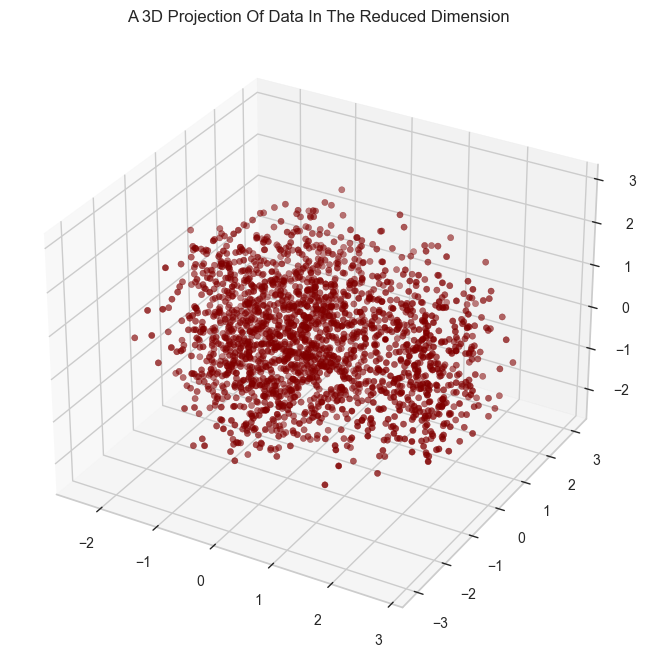

In [16]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# AGGLOMERATIVE CLUSTERING

Elbow Method to determine the number of clusters to be formed:


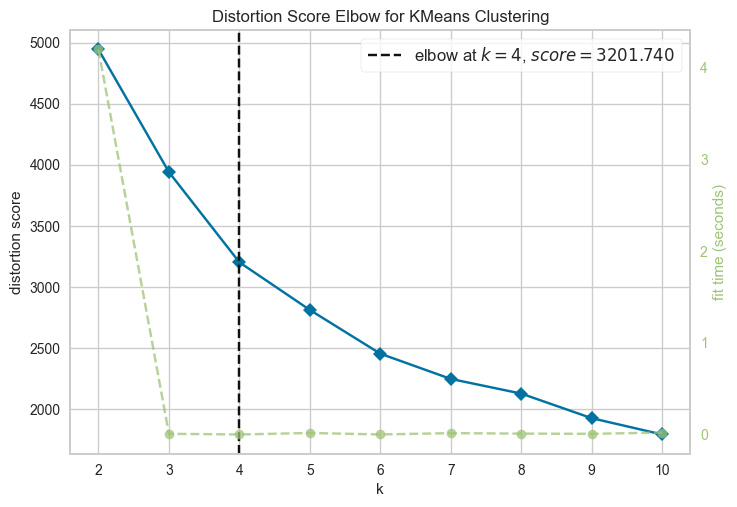

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [18]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

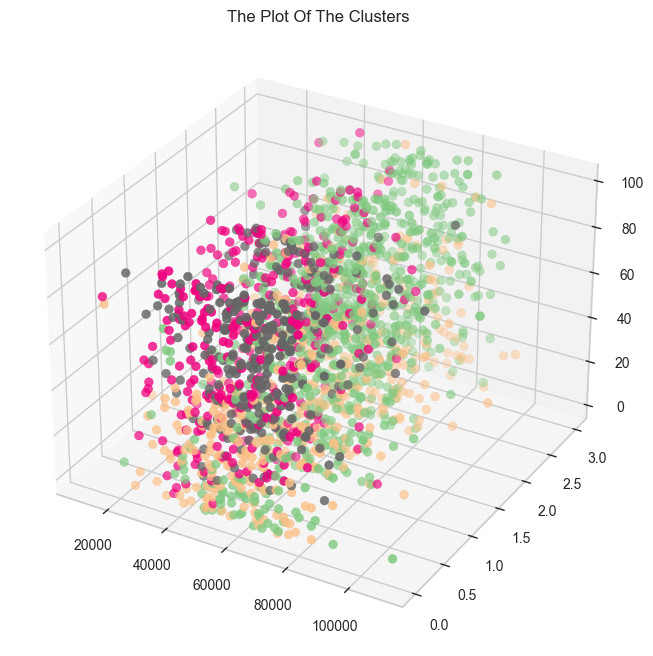

In [20]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(data["Annual_Income"], data["Membership_Level"], data["Spending_Score"], s=40, c=PCA_ds["Clusters"], marker='o', cmap='Accent')
ax.set_title("The Plot Of The Clusters")
plt.show()

# EVALUATING MODEL

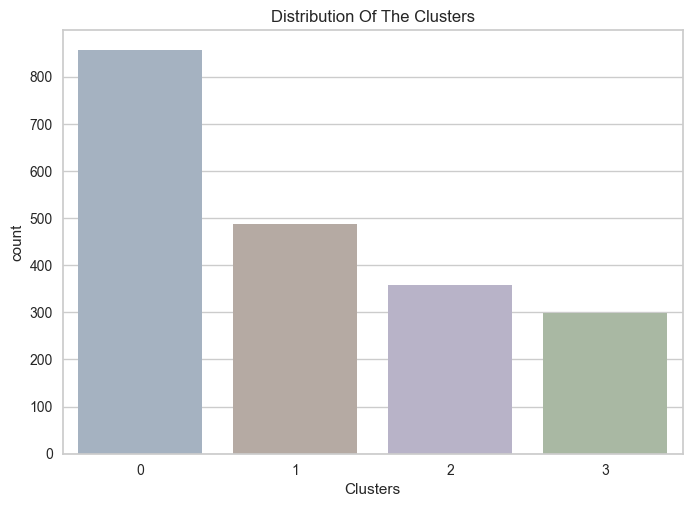

In [38]:
#Plotting countplot of clusters
pal = ['#A0B2C6', '#B8A9A0', '#B6AFCB', '#A8BBA0']
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

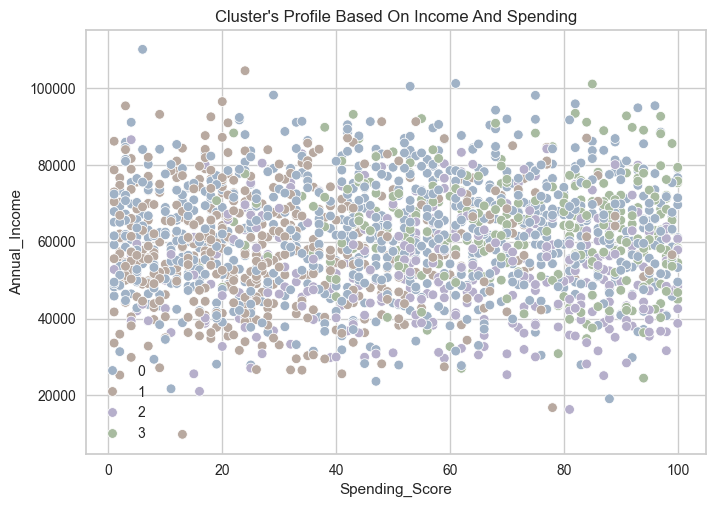

In [39]:
pl = sns.scatterplot(data = data,x=data["Spending_Score"], y=data["Annual_Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

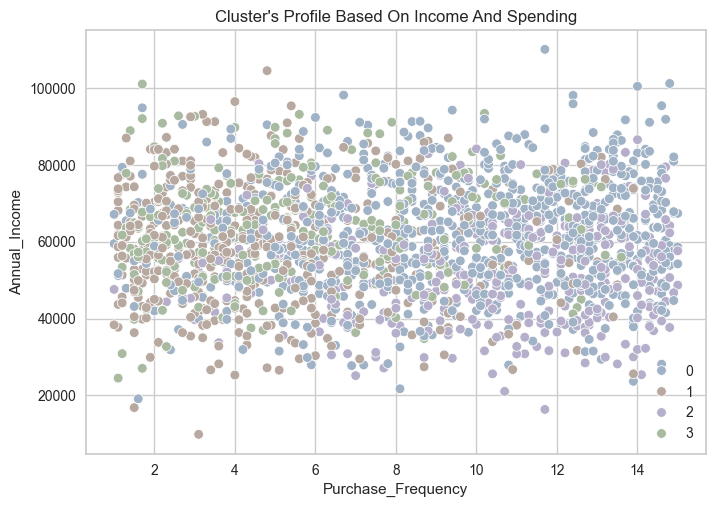

In [40]:
pl = sns.scatterplot(data = data,x=data["Purchase_Frequency"], y=data["Annual_Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

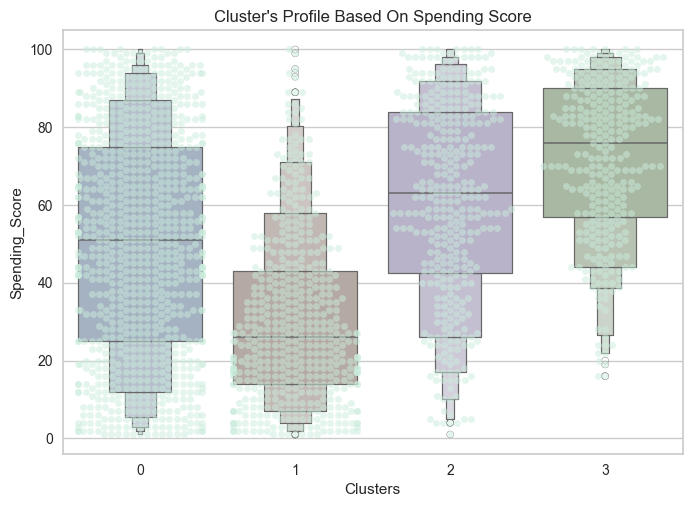

In [41]:
# detailed distribution of clusters as per the various products in the data
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spending_Score"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spending_Score"], palette=pal)
pl.set_title("Cluster's Profile Based On Spending Score")

plt.show()

cluster 3 is our biggest set of customers closely followed by cluster 2

# PROFILING

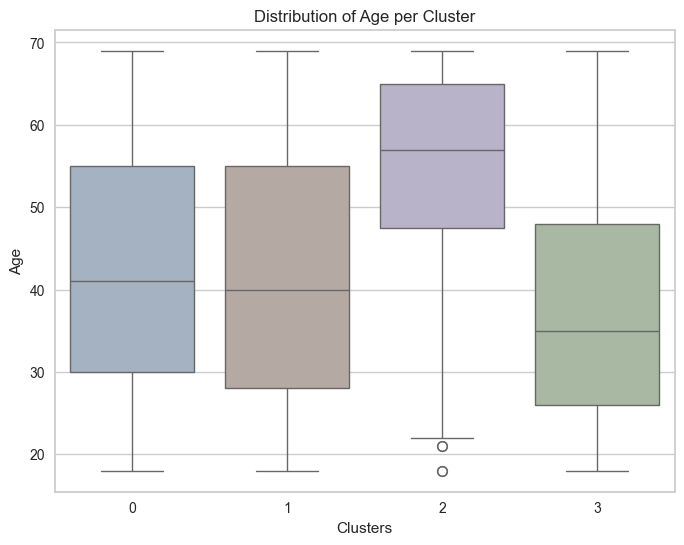

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Clusters", y="Age", data=data, palette=pal)
plt.title("Distribution of Age per Cluster")
plt.show()

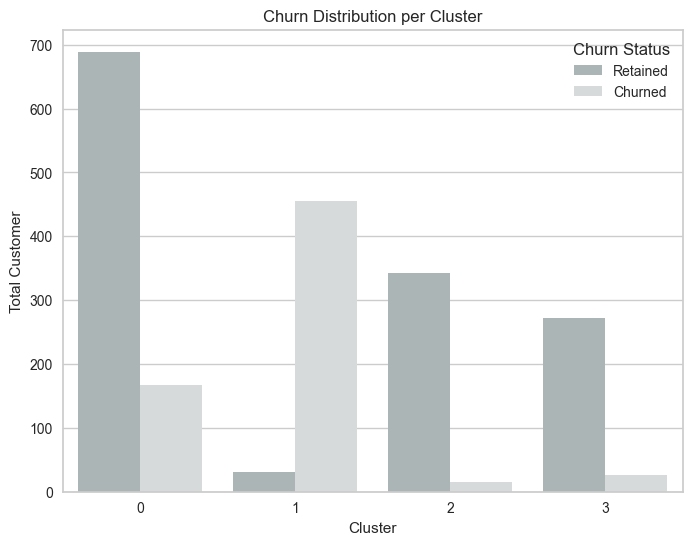

In [59]:
colors_2 = ['#AAB7B8', '#D5DBDB']
plt.figure(figsize=(8,6))
sns.countplot(data=data, x="Clusters", hue="Churn_Status", palette=colors_2)
plt.title("Churn Distribution per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Customer")
plt.legend(title="Churn Status", labels=["Retained", "Churned"])
plt.show()

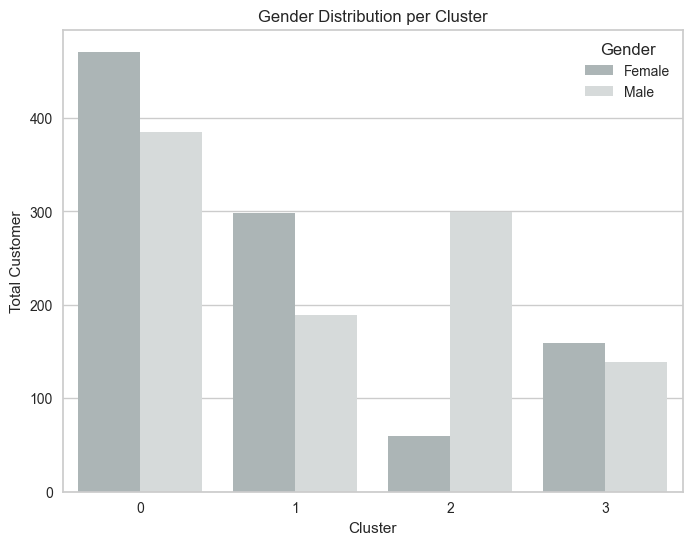

In [60]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x="Clusters", hue="Gender", palette=colors_2)
plt.title("Gender Distribution per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Customer")
plt.legend(title="Gender", labels=["Female", "Male"])
plt.show()

In [27]:
# Distribusi kategorikal per cluster
cat_features = ["Gender", "Membership_Level", "Churn_Status"] 

for col in cat_features:
    print(f"\n{col} Distribution per Cluster:")
    display(pd.crosstab(data["Clusters"], data[col], normalize='index') * 100)


Gender Distribution per Cluster:


Gender,0,1
Clusters,,
0,55.023364,44.976636
1,61.190965,38.809035
2,16.713092,83.286908
3,53.355705,46.644295



Membership_Level Distribution per Cluster:


Membership_Level,0,1,2,3
Clusters,,,,
0,9.929907,28.271028,37.850467,23.948598
1,29.979466,28.542094,24.640657,16.837782
2,42.061281,34.540390,22.005571,1.392758
3,70.805369,27.181208,2.013423,0.000000



Churn_Status Distribution per Cluster:


Churn_Status,0,1
Clusters,,
0,80.490654,19.509346
1,6.365503,93.634497
2,95.543175,4.456825
3,91.275168,8.724832


In [28]:
# Hitung jumlah churn dan retained per cluster
churn_per_cluster = data.groupby("Clusters")["Churn_Status"].value_counts(normalize=True).unstack() * 100
churn_per_cluster.columns = ["Retained (%)", "Churned (%)"]
print(churn_per_cluster)


          Retained (%)  Churned (%)
Clusters                           
0            80.490654    19.509346
1             6.365503    93.634497
2            95.543175     4.456825
3            91.275168     8.724832


In [29]:
# Summary statistik (mean) per cluster
cluster_summary = data.groupby("Clusters").mean(numeric_only=True)
cluster_summary

,Age,Gender,Annual_Income,Spending_Score,Membership_Level,Purchase_Frequency,Churn_Status
Clusters,,,,,,,
0,42.320093,0.449766,62224.644860,50.073598,1.758178,9.464603,0.195093
1,41.574949,0.388090,58709.186858,30.316222,1.283368,4.893840,0.936345
2,54.788301,0.832869,52475.142061,61.025070,0.827298,10.433705,0.044568
3,36.916107,0.466443,63774.382550,71.825503,0.312081,5.940268,0.087248


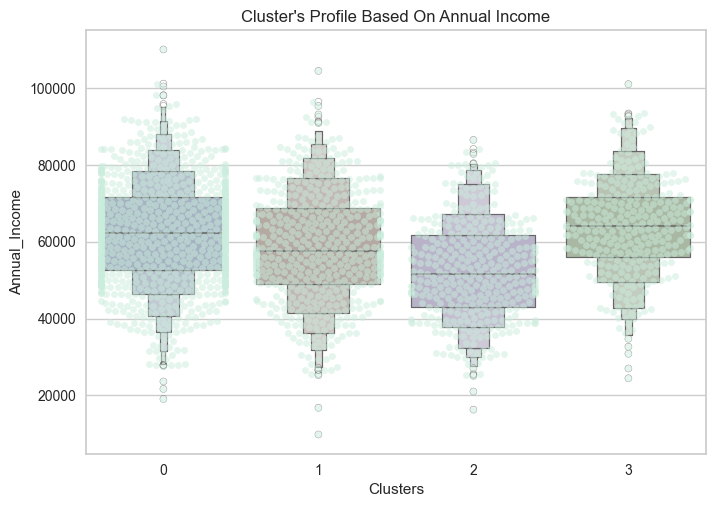

In [44]:
# detailed distribution of clusters as per the various products in the data
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Annual_Income"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Annual_Income"], palette=pal)
pl.set_title("Cluster's Profile Based On Annual Income")
plt.show()

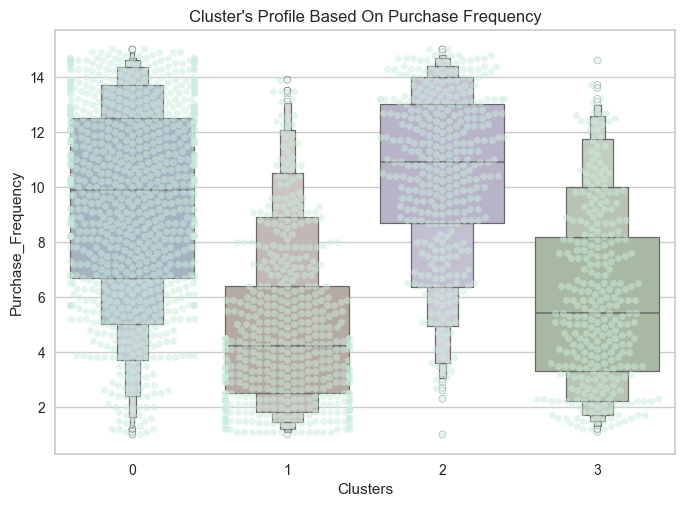

In [48]:
# detailed distribution of clusters as per the various products in the data
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Purchase_Frequency"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Purchase_Frequency"], palette=pal)
pl.set_title("Cluster's Profile Based On Purchase Frequency")
plt.show()

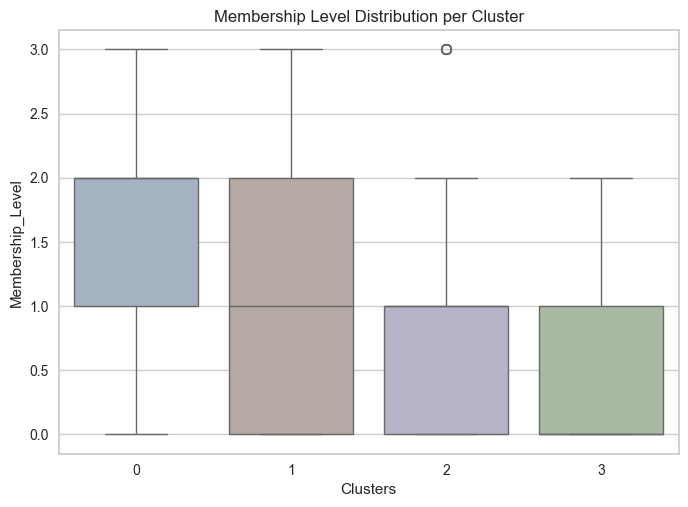

In [49]:
sns.boxplot(data=data, x="Clusters", y="Membership_Level", palette=pal)
plt.title("Membership Level Distribution per Cluster")
plt.show()

<Figure size 1000x600 with 0 Axes>

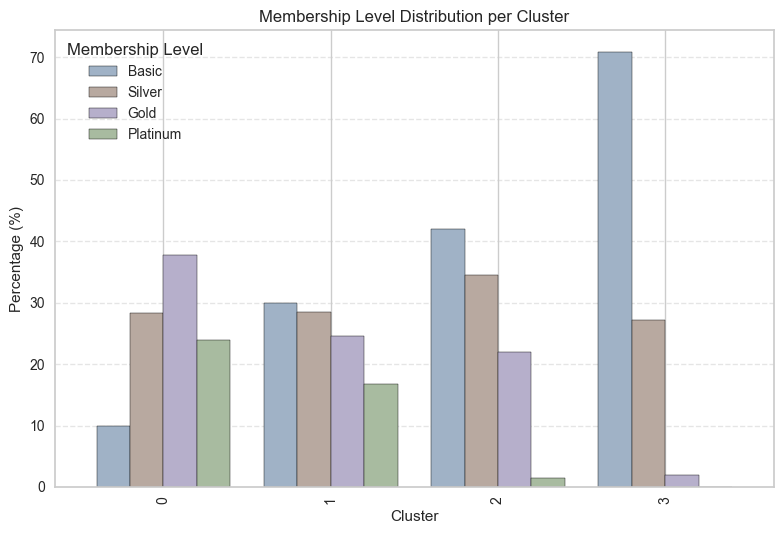

In [64]:
# Hitung distribusi Membership_Level per Cluster dalam persen
dist = data.groupby(['Clusters', 'Membership_Level']).size().unstack().fillna(0)
dist_percent = dist.div(dist.sum(axis=1), axis=0) * 100

# Plot grouped bar chart
plt.figure(figsize=(10,6))
colors = ['#A0B2C6', '#B8A9A0', '#B6AFCB', '#A8BBA0']  # Tinted grayscale tone

dist_percent.plot(kind='bar', color=colors, edgecolor='black', width=0.8)

plt.title('Membership Level Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage (%)')
plt.legend(title='Membership Level', labels=["Basic", "Silver", "Gold", "Platinum"])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [43]:
# Simpan hasil penggabungan data + cluster + PCA
data.to_csv("segmented_data.csv", index=False)

# Simpan hasil ringkasan per cluster
cluster_summary.to_csv("cluster_summary.csv")